**Creating Simple Steepest Descent Methods in Python.**
Some methods were done explicitly and some were done using built-in module *optimize* from the Python library Scientific Python (SciPy).

by: 
Jose Aries E. De Los Santos
SN: 2021-21523



In [1]:
#Importing Libraries and Modules that will be used
from scipy import linalg as la
from scipy import optimize
import numpy as np
import sympy
sympy.init_printing()
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#For Calculating Partial Derivatives using the Finite Difference Method

def fp(f,x,h):
    """
    Gradient of the Objective Function using the 
    Finite Difference Three-Point Formula for the First Derivative
    
    Parameters:
    f - The Objective function must by a function of two variables, (e.g. f(a,b))
    x - must contain two values (e.g. x = np.array([a,b]))
    h - step size

    """
    x1 = x[0].item()
    x2 = x[1].item()
    a1 = np.array([x1+h,x2]); b1 = np.array([x1-h,x2])
    a2 = np.array([x1,x2+h]); b2 = np.array([x1,x2-h])
    g11 = (fun(a1)-fun(b1))/(2*h)
    g12 = (fun(a2)-fun(b2))/(2*h)
    return np.array([g11,g12])

def fh(f,x,h):
    """
    Hessian of the Objective Function using 
    Finite Difference Three-point Formula for the Second Derivative

    Parameters:
    f - The Objective function must by a function of two variables, (e.g. f(a,b))
    x - must contain two values (e.g. x = np.array([a,b]))
    h - step size
    
    """
    x1 = x[0].item()
    x2 = x[1].item()
    a1 = np.array([x1-h,x2]); a2 = np.array([x1,x2]); a3 = np.array([x1+h,x2])
    b1 = np.array([x1,x2-h]); b2 = np.array([x1,x2]); b3 = np.array([x1,x2+h])
    c1 = np.array([x1-h,x2-h]); c2 = np.array([x1,x2]); c3 = np.array([x1+h,x2+h])
    h11 = (fun(a1)-2*fun(a2)+fun(a3))/(h**2)
    h22 = (fun(b1)-2*fun(b2)+fun(b3))/(h**2)
    h12 = h21 = (fun(c1)-2*fun(c2)+fun(c3))/(2*(h**2)) - (1/2)*h11 - (1/2)*h22 
    return np.array([[h11,h12],[h21,h22]])

Minimum of the Objective function at found at : [1.88292649 1.37658594]
Number of iterations: 11
Current Function Value -3.8672228877101595


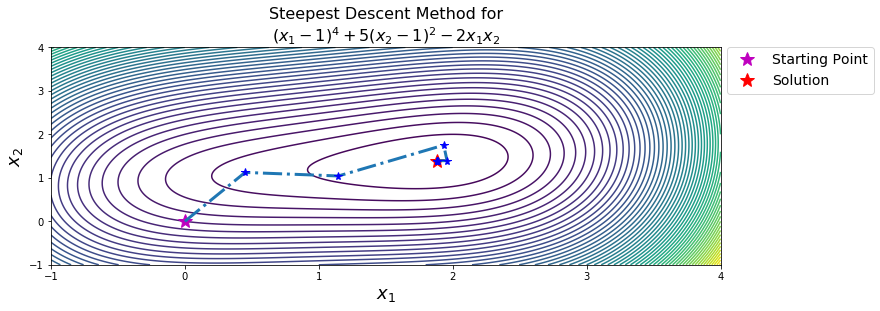

In [4]:
#Create the Objective Function
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return (x[0] - 1)**4 + 5*(x[1] - 1)**2 - 2*x[0]*x[1]

#Initialize
x1 = 0; x2 = 0; h = 1e-5; x0 = np.array([x1, x2])

#Steepest Descent Method Similar Algorithm to MATLAB
iter = 0
xdict = []

while la.norm(fp(fun,x0,h)) > 1e-5 and iter < 2e+3:
    xdict.append(x0.copy())
    g = -fp(fun,x0,h)
    H = fh(fun,x0,h)
    a = np.dot(g.T, g) / np.dot(np.dot(g.T, H),g)
    x = x0 + a * g
    x0 = x
    iter = iter + 1

xdict = np.array(xdict)
xdict1 = xdict[:, 0]
xdict2 = xdict[:, 1]

print("Minimum of the Objective function at found at :", x0)
print("Number of iterations:", iter)
print("Current Function Value", fun(x0))


#Redefining the objective Function for plotting
def fplot(x1, x2):
    return (x1 - 1)**4 + 5*(x2 - 1)**2 - 2*x1*x2

fig, axes = plt.subplots(figsize=(12,4))
x_ = y_ = np.linspace(-1,4,400)
X,Y = np.meshgrid(x_,y_); 
contplot = axes.contour(X,Y,fplot(X,Y),70)
axes.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
axes.plot(x0[0],x0[1],"r*", markersize=15,label="Solution")
axes.plot(xdict1,xdict2,ls="-.",lw=3)
for i in range(1,np.size(xdict1)):
    axes.plot(xdict1[i],xdict2[i],"b*",markersize=8)
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method for\n" + r"$(x_1-1)^4 + 5(x_2-1)^2-2x_1x_2$",fontsize=16)
axes.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.0,ncol=1,fontsize=14)
plt.show()

Minimum of the Objective function at found at : [1.88292649 1.37658594]
Current Function Value -3.8672228877127015


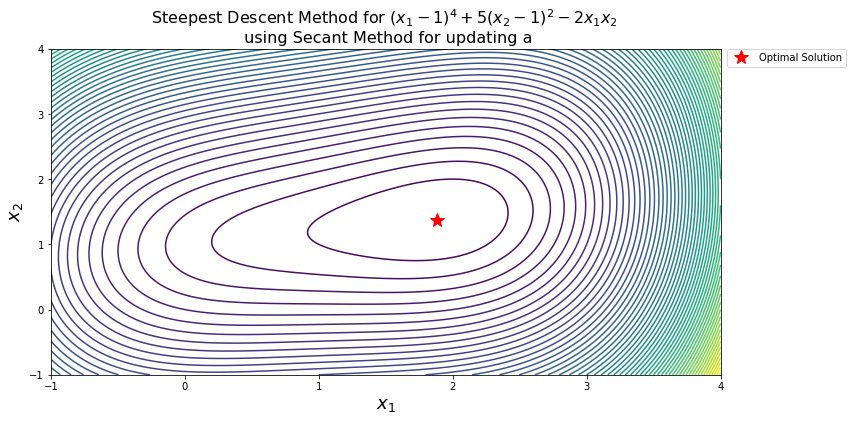

In [5]:
"""
Steepest Descent Algorithm done explicitly and using Secant method to update "a"
in x = x0 + a*g.T
"""
def secant(df,x0,x1,max_iter=120,tol=1e-3):
    for i in range(max_iter):
        x = (x0*df(x1) - x1*df(x0))/(df(x1)-df(x0))
        if np.abs(x-x1)/np.abs(x1) < tol:
            break
        x0 = x1
        x1 = x
    return x

def grad_descent(fun,grad,x0,max_iter=190,tol=1e-5):

    for i in range(max_iter):
        g = grad(x0)

        def d_fun(a):
            return np.dot(g.T, grad(x0-a*g))

        step_size = secant(d_fun,1,2,50,1e-3)

        x = x0 - step_size * g

        if la.norm(x-x0) / la.norm(x0) < tol:
            break

        x0 = x

    return x
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    y = (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2
    return y
def grad(x):
    x1 = x[0].item()
    x2 = x[1].item()
    g = np.zeros((2,1))
    a1 = np.array([x1+h,x2]); b1 = np.array([x1-h,x2])
    a2 = np.array([x1,x2+h]); b2 = np.array([x1,x2-h])
    g[0] = (fun(a1)-fun(b1))/(2*h)
    g[1] = (fun(a2)-fun(b2))/(2*h)
    return g

xinit = np.array([0,0]); xinit = np.reshape(x0,(2,1))
x_opt = grad_descent(fun,grad,xinit,170,1e-5)
print("Minimum of the Objective function at found at :", x0)
print("Current Function Value", fun(x_opt))

#Define the Objective Function for plotting, contour plot
def fplot(x1, x2):
    return (x1 - 1)**4 + 5*(x2 - 1)**2 - 2*x1*x2

fig, axes = plt.subplots(figsize=(12,6))
x_1 = y_1 = np.linspace(-1,4,400)
X1,Y1 = np.meshgrid(x_1,y_1)
contplot = axes.contour(X1,Y1,fplot(X1,Y1),72)
axes.plot(x_opt[0],x_opt[1],"r*",markersize=15, label="Optimal Solution")
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method for $(x_1-1)^4 + 5(x_2-1)^2-2x_1x_2$ \n using Secant Method for updating a",fontsize=16)
axes.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.0,ncol=1)
plt.show()

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 6


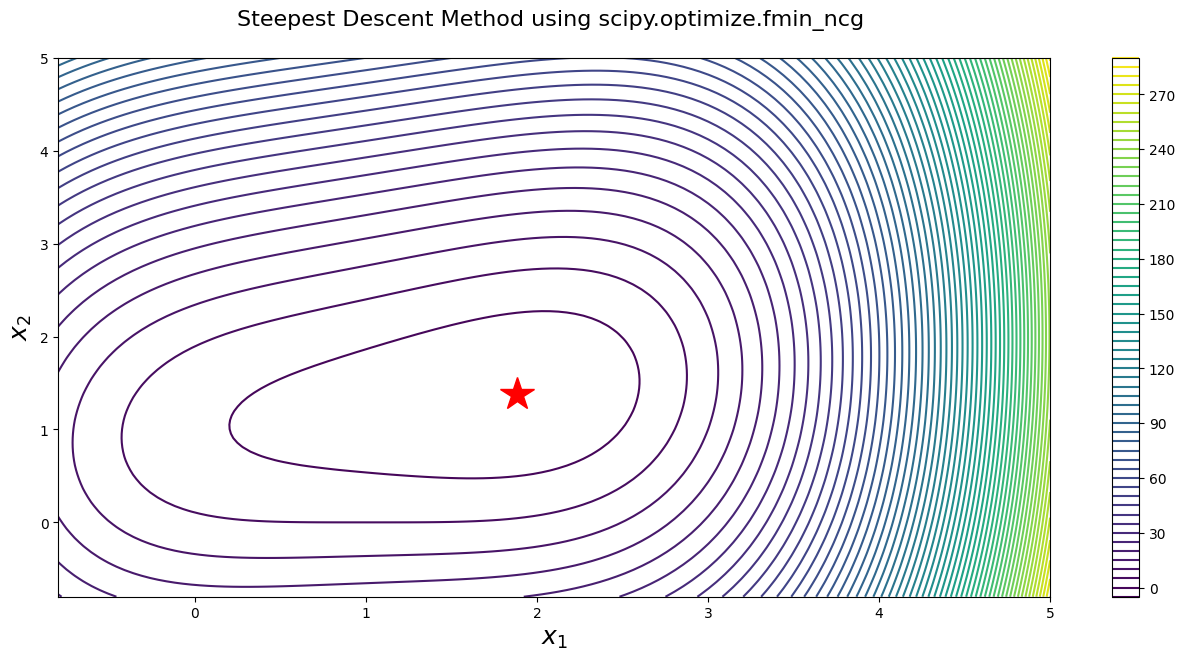

In [12]:
"""
Steepest Descent Algorithm using scipy.optimize.fmin_ncg
Unconstrained minimization of a function using the Newton-CG method.
"""

#Steepest Descent Method
x1,x2 = sympy.symbols("x_1,x_2")
#chosen objective function to be minimized
f_obj = (x1-1)**4 + 5 *(x2-1)**2-2*x1*x2
# f_obj = 100*(x2-x1**2)**2 + (1-x1) #Rosenbrock Function
# f_obj = 4*x1**2 + x2 ** 2 - 2*x1*x2



#Gradient of the Objective function
fprime_obj = [f_obj.diff(x_) for x_ in (x1,x2)]
sympy.Matrix(fprime_obj)

#Hessian of the Objective Function
f_obj_hess = [[f_obj.diff(x1_,x2_) for x1_ in (x1,x2)] for x2_ in (x1,x2)]
sympy.Matrix(f_obj_hess)

#create vectorized functions
fobj_l = sympy.lambdify((x1,x2),f_obj,'numpy')
fp_l = sympy.lambdify((x1,x2),fprime_obj,'numpy')
fh_l = sympy.lambdify((x1,x2),f_obj_hess,'numpy')

def functoxy(f):
    return lambda X: np.array(f(X[0],X[1]))
fobj = functoxy(fobj_l) #Objective Function
fp = functoxy(fp_l) #Gradient
fh = functoxy(fh_l) #Hessian

x_min = optimize.fmin_ncg(fobj,(0.6,0.6),fprime=fp,fhess=fh); #print(x_min)

fig, axes = plt.subplots(figsize=(16,7))
x_2 = y_2 = np.linspace(-0.8,5,120)
X2,Y2 = np.meshgrid(x_2,y_2)
contplot = axes.contour(X2,Y2,fobj_l(X2,Y2),60)
axes.plot(x_min[0],x_min[1],"r*", markersize=25)
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method using scipy.optimize.fmin_ncg \n",fontsize=16)
plt.colorbar(contplot,ax=axes)
plt.show()

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9


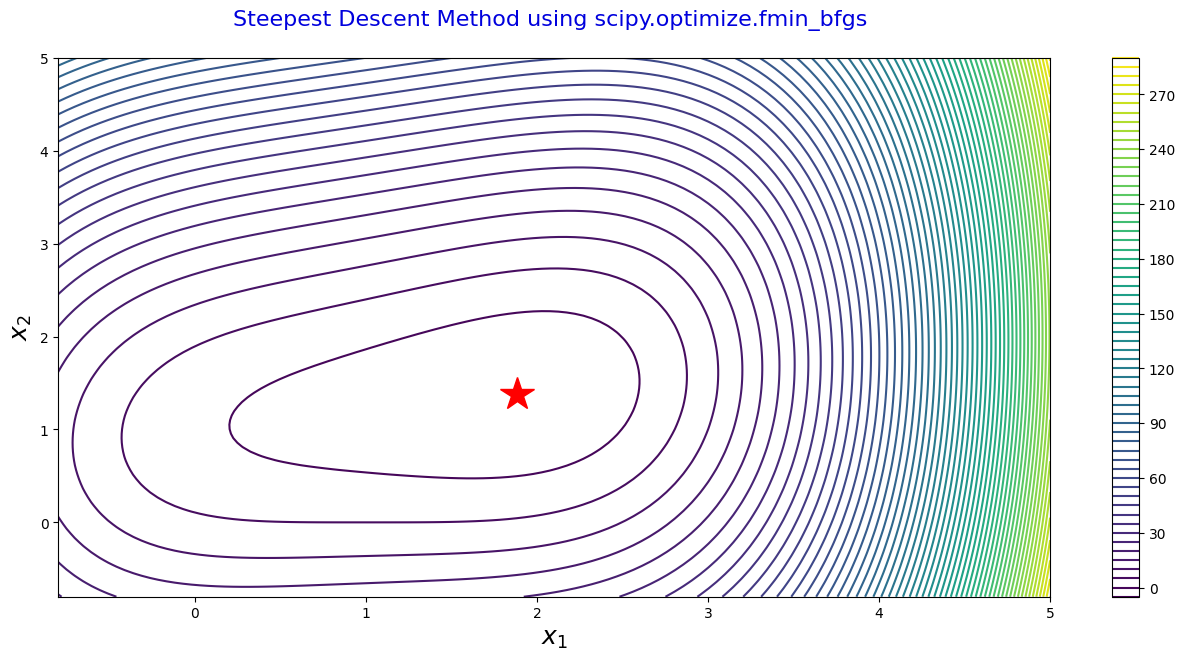

In [14]:
"""
Steepest Descent Algorithm using scipy.optimize.bfgs

Optimize the function, f, whose gradient is given by fprime using the quasi-Newton method of
Broyden, Fletcher, Goldfarb, and Shanno (BFGS).
"""

#Steepest Descent Method
x1,x2 = sympy.symbols("x_1,x_2")
#chosen objective function to be minimized
f_obj = (x1-1)**4 + 5 *(x2-1)**2-2*x1*x2
# f_obj = 100*(x2-x1**2)**2 + (1-x1) #Rosenbrock Function
# f_obj = 4*x1**2 + x2 ** 2 - 2*x1*x2



#Gradient of the Objective function
fprime_obj = [f_obj.diff(x_) for x_ in (x1,x2)]
sympy.Matrix(fprime_obj)

#Hessian of the Objective Function
f_obj_hess = [[f_obj.diff(x1_,x2_) for x1_ in (x1,x2)] for x2_ in (x1,x2)]
sympy.Matrix(f_obj_hess)

#create vectorized functions
fobj_l = sympy.lambdify((x1,x2),f_obj,'numpy')
fp_l = sympy.lambdify((x1,x2),fprime_obj,'numpy')
fh_l = sympy.lambdify((x1,x2),f_obj_hess,'numpy')

def functoxy(f):
    return lambda X: np.array(f(X[0],X[1]))
fobj = functoxy(fobj_l) #Objective Function
fp = functoxy(fp_l) #Gradient
fh = functoxy(fh_l) #Hessian

x_min = optimize.fmin_bfgs(fobj,(0.6,0.6),fprime=fp); #print(x_min)

fig, axes = plt.subplots(figsize=(16,7))
x_2 = y_2 = np.linspace(-0.8,5,120)
X2,Y2 = np.meshgrid(x_2,y_2)
contplot = axes.contour(X2,Y2,fobj_l(X2,Y2),60)
axes.plot(x_min[0],x_min[1],"r*", markersize=25)
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method using scipy.optimize.fmin_bfgs \n",fontsize=16, color="#0000dd")
plt.colorbar(contplot,ax=axes)
plt.show()

References: 
1.) Sauer, T. (2017). Numerical Analysis (3rd ed.). Pearson. 
2.) Luenberger, D. G., & Ye, Y. (2022). Linear and nonlinear programming (5th ed.). Springer Nature. 
3.) Burden, A., Burden, R., & Faires, J. D. (2015). Numerical Analysis (10th ed.). CENGAGE Learning Custom Publishing. 
4.) Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and numerical methods: A guide for engineers and scientists. Academic Press.